<a href="https://colab.research.google.com/github/revanth-15/British-Airways/blob/main/Task_two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows:
    num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0               

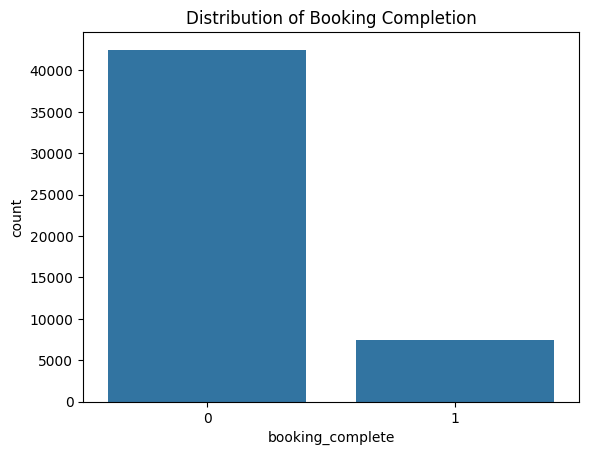

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/customer_booking.csv', encoding='ISO-8859-1')

# Basic exploration
print("First 5 rows:\n", df.head())
print("\nSummary statistics:\n", df.describe())
print("\nColumn Info:\n")
df.info()

# Checking for missing values
print("\nMissing values in each column:\n", df.isnull().sum())

# Optional: Visualize distribution of target variable
sns.countplot(data=df, x='booking_complete')
plt.title("Distribution of Booking Completion")
plt.show()

# Feature Engineering
# Example: Create price_per_km (assuming 'price' and 'distance' columns exist)
if 'price' in df.columns and 'distance' in df.columns:
    df['price_per_km'] = df['price'] / df['distance']

# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df.drop(columns=['booking_complete'])
y = df['booking_complete']


In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [4]:
# Model Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.55      0.13      0.21      1480

    accuracy                           0.86     10000
   macro avg       0.71      0.56      0.57     10000
weighted avg       0.82      0.86      0.82     10000

Confusion Matrix:
 [[8362  158]
 [1283  197]]
Accuracy Score: 0.8559
Cross-validation scores: [0.8497 0.7815 0.7255 0.5396 0.7818]
Mean cross-validation score: 0.73562


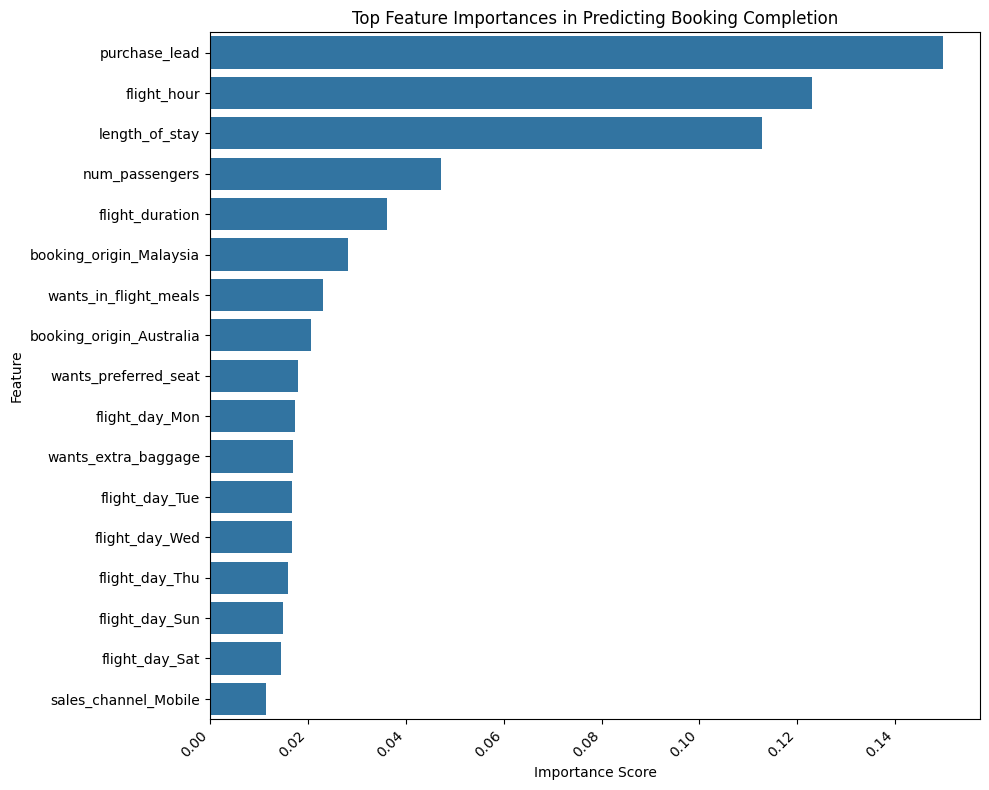

In [10]:
# Feature Importances with a Threshold
importances = model.feature_importances_
feature_names = X.columns

# Create DataFrame and filter low-importance features
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Set a threshold to exclude features with very low importance
threshold = 0.01  # Adjust as needed
importance_df = importance_df[importance_df['Importance'] >= threshold]

# Plotting with filtered feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Top Feature Importances in Predicting Booking Completion")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

